In [40]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [41]:
#  Import and read the heart.csv.
heart = pd.read_csv("data.csv")
#Replacing strings with numbers for Gender and Exercise Angina
gender = {'M': 1,'F': 0}
heart.Sex = [gender[item] for item in heart.Sex]
ex_angina={'N': 0,'Y': 1}
heart.ExerciseAngina = [ex_angina[item] for item in heart.ExerciseAngina]
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [43]:
# Project only necessary Sex and separate target feature for training data
cluster_df = heart[['Age', 'Sex', 'ExerciseAngina', 'Cholesterol', 'HeartDisease']]
cluster_df.head(4)

,Age,Sex,ExerciseAngina,Cholesterol,HeartDisease
0,40,1,0,289,0
1,49,0,0,180,1
2,37,1,0,283,0
3,48,0,1,214,1


In [44]:
# Scale the data
scaler = StandardScaler()
scaled_data= scaler.fit_transform(cluster_df)
scaled_data

array([[-1.4331398 ,  0.51595242, -0.8235563 ,  0.82507026, -1.11311472],
       [-0.47848359, -1.93816322, -0.8235563 , -0.17196105,  0.89837999],
       [-1.75135854,  0.51595242, -0.8235563 ,  0.7701878 , -1.11311472],
       ...,
       [ 0.37009972,  0.51595242,  1.21424608, -0.62016778,  0.89837999],
       [ 0.37009972, -1.93816322, -0.8235563 ,  0.34027522,  0.89837999],
       [-1.64528563,  0.51595242, -0.8235563 , -0.21769643, -1.11311472]])

In [47]:
# Create a new dataframe with the transormed data
scaled_df=pd.DataFrame(scaled_data, columns=cluster_df.columns[0:])
scaled_df

,Age,Sex,ExerciseAngina,Cholesterol,HeartDisease
0,-1.433140,0.515952,-0.823556,0.825070,-1.113115
1,-0.478484,-1.938163,-0.823556,-0.171961,0.898380
2,-1.751359,0.515952,-0.823556,0.770188,-1.113115
3,-0.584556,-1.938163,1.214246,0.139040,0.898380
4,0.051881,0.515952,-0.823556,-0.034755,-1.113115
...,...,...,...,...,...
913,-0.902775,0.515952,-0.823556,0.596393,0.898380
914,1.536902,0.515952,-0.823556,-0.053049,0.898380
915,0.370100,0.515952,1.214246,-0.620168,0.898380
916,0.370100,-1.938163,-0.823556,0.340275,0.898380


In [56]:
# Perform dimensionality reduction with PCA. Rather than specify the number of principal components when you instantiate the PCA
# model, it is possible to state the desired explained variance.
pca = PCA(n_components=0.90)
# get principal components for the data
pca_cluster_data = pca.fit_transform(scaled_df)

In [57]:
#Create a dataframe with the transformed data
pca_cluster_heart_data = pd.DataFrame(data=pca_cluster_data)
pca_cluster_heart_data

,0,1,2,3
0,1.650988,-0.663572,-1.222721,-0.499441
1,0.772397,0.350665,0.793219,1.455173
2,1.750311,-0.829604,-1.408786,-0.321303
3,-0.132791,1.303184,-0.107647,2.139540
4,0.853535,-0.648210,0.200676,-0.897955
...,...,...,...,...
913,0.180813,-0.447171,-0.930494,-0.226015
914,-0.900923,0.097413,1.028347,-1.176681
915,-1.683066,0.023388,-0.146937,0.371092
916,0.617025,1.042419,1.107393,0.838236


In [58]:
#  run t-SNE on the principal components: the output of the PCA transformation
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=100)
tsne_features = tsne.fit_transform(pca_cluster_heart_data)

In [51]:
# The dataset has 2 columns
tsne_features.shape

(918, 2)

In [59]:
# Prepare to plot the dataset
# The first column of transformed features
pca_cluster_heart_data['x'] = tsne_features[:,0]

# The second column of transformed features
pca_cluster_heart_data['y'] = tsne_features[:,1]

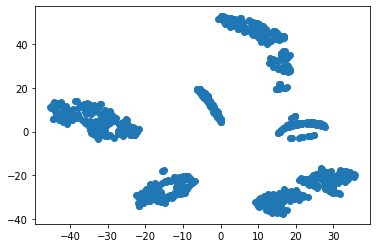

In [60]:
# Visualize the clusters
plt.scatter(pca_cluster_heart_data['x'], pca_cluster_heart_data['y'])
plt.show()

In [35]:
# Initializing model with K=2
model = KMeans(n_clusters=3, random_state=10)

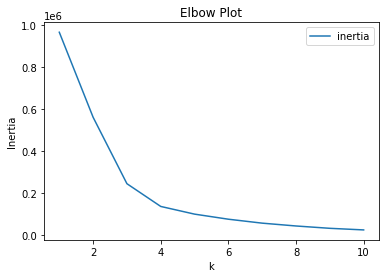

In [36]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit()
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
# df_elbow.hvplot.line(x = 'k', y = 'inertia', titles = 'clusters')

elbow_heart_df = pd.DataFrame({'k': k, 'inertia': inertia})
elbow_heart_df.plot.line(x='k', y='inertia')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

In [37]:
#The variables that could predict heart failure could be clustered together into 3 clusters to create a classification system for
#heart failure prediction purposes. My conclusion is based on the k-means algorithm which is an unsupervised clustering algorithm. 
#The data is grouped into 3 distinct groups which provides greater clarity.
#We don’t know whats in these 3 groups but we will be able to use this info to conduct further research on predicting heart failure.

In [14]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(pca_cluster_heart_data)

# Predict clusters
predictions = model.predict(pca_cluster_heart_data)

# Add the predicted class column to the dataframe
pca_cluster_heart_data["class"] = model.labels_
pca_cluster_heart_data.head()

,0,1,2,3,x,y,class
0,1.650988,-0.663572,-1.222721,-0.499441,12.555256,31.514608,2
1,0.772397,0.350665,0.793219,1.455173,-33.435562,-6.996380,1
2,1.750311,-0.829604,-1.408786,-0.321303,13.550009,30.136938,2
3,-0.132791,1.303184,-0.107647,2.139540,-30.985300,-12.140553,1
4,0.853535,-0.648210,0.200676,-0.897955,-5.523360,30.461288,2


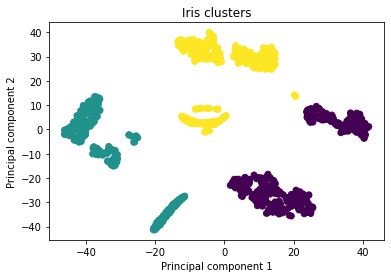

In [15]:
# Visualize the clusters
plt.scatter(x=pca_cluster_heart_data['x'], y=pca_cluster_heart_data['y'], c=pca_cluster_heart_data['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Heart Failure Prediction')
plt.show()